# Kaggle Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand
<br>
<br>
* Bike_Sharing_Demand.csv (10,886 * 12)
  * datetime : Date + Timestamp
  * season : 1(봄), 2(여름), 3(가을), 4(겨울)
  * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
  * workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
  * weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/번개)
  * temp : 온도(섭씨)
  * atemp : 체감온도(섭씨)
  * humidity : 습도
  * windspeed : 풍속
  * casual : 사전 등록되지 않은 사용자 대여 횟수
  * registered : 사전 등록된 사용자 대여 횟수
  * count : 총 대여 횟수 -> y

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [108]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [90]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [109]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)

In [92]:
DF.head(24)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


> ## 2) Drop Columns

* 'datetime', 'casual', 'registered'

In [110]:
drop_columns = ['datetime'] #'casual', 'registered']

DF.drop(drop_columns, axis = 1,inplace = True)

In [103]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


In [33]:
DF['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [34]:
DF.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


# 
# 
# 
# The End
# 
# 
# 


# 탐색적 데이터 분석
## 패키지

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


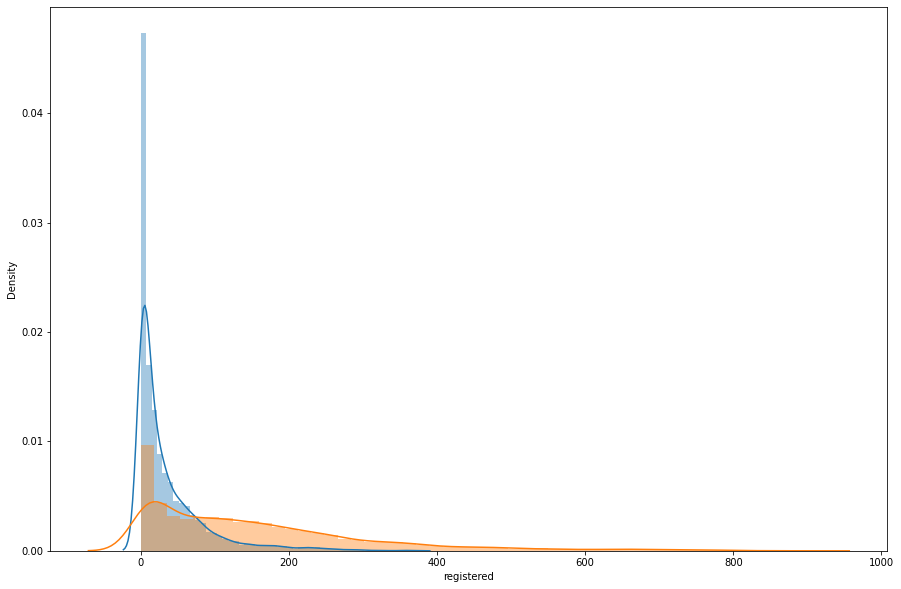

In [39]:
plt.figure(figsize = (15, 10))
sns.distplot(DF.casual, hist = True, kde = True)
sns.distplot(DF.registered, hist = True, kde = True)
plt.show()

In [52]:
DF['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

4개절 있음\
데이터 쪼갤때 임의니까 당형히 1번계절 적은것도 고려되서 비율로 빠지나

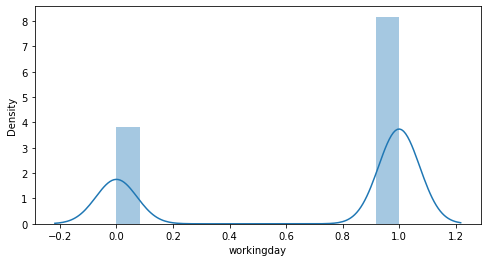

In [45]:
plt.figure(figsize = (8, 4))
sns.distplot(DF.workingday)
plt.show()

일단 일하는 수는 8:4인가?

In [51]:
DF['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [47]:
DF['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

공휴일(일요일제외?)

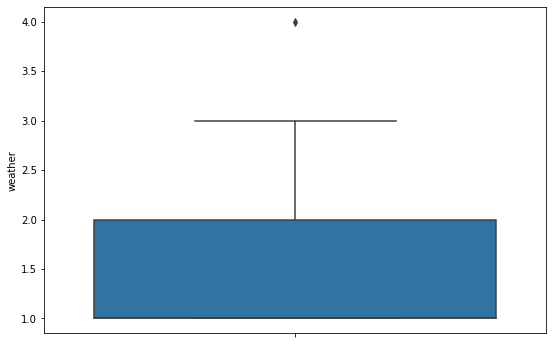

In [50]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'weather', data = DF)
plt.show()

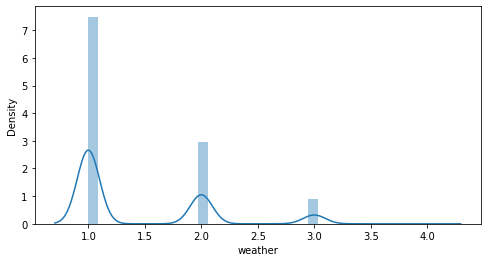

In [53]:
plt.figure(figsize = (8, 4))
sns.distplot(DF.weather)
plt.show()

### 날씨가 정확히 무엇인가? 사용 X

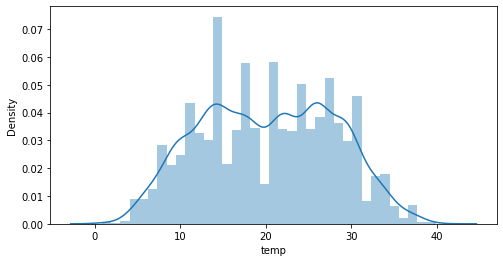

In [49]:
plt.figure(figsize = (8, 4))
sns.distplot(DF.temp)
plt.show()

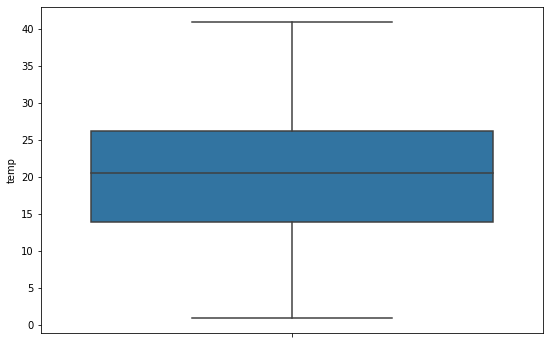

In [55]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'temp', data = DF)
plt.show()

온도 분포가 뚜렸하여 영향이 있을듯함

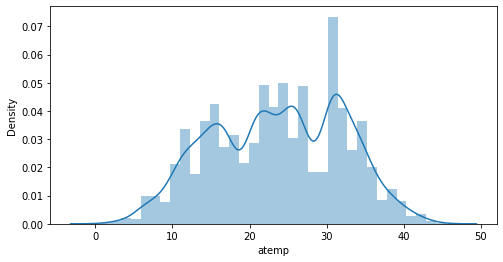

In [54]:
plt.figure(figsize = (8, 4))
sns.distplot(DF.atemp)
plt.show()

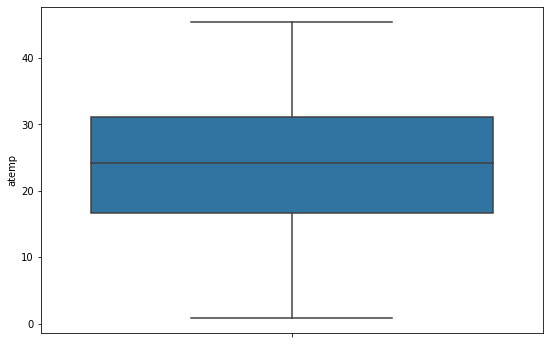

In [56]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'atemp', data = DF)
plt.show()

atemp 의미 있을듯함

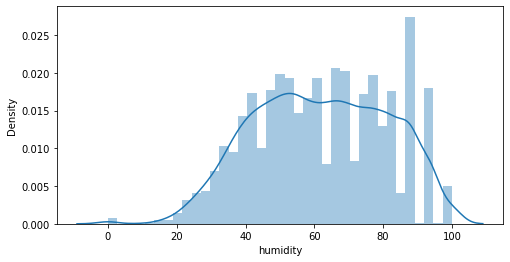

In [57]:
plt.figure(figsize = (8, 4))
sns.distplot(DF.humidity)
plt.show()

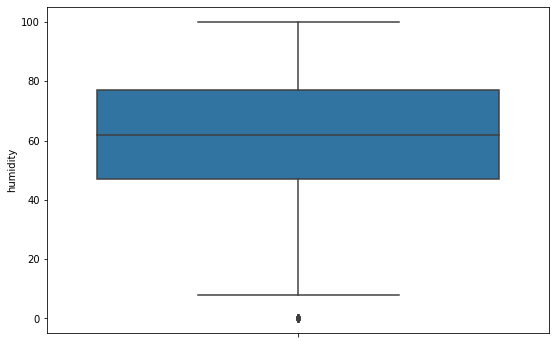

In [58]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'humidity', data = DF)
plt.show()

습도 의미 있을듯함

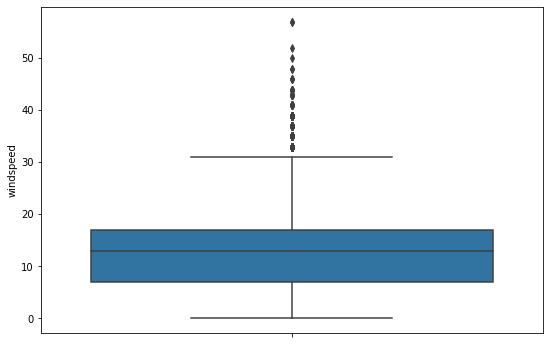

In [59]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'windspeed', data = DF)
plt.show()


outlier 가 있음 사용

시간대 사용

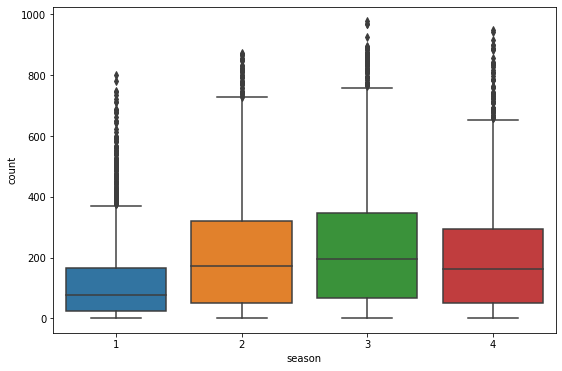

In [60]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'season', y = 'count', data = DF)
plt.show()

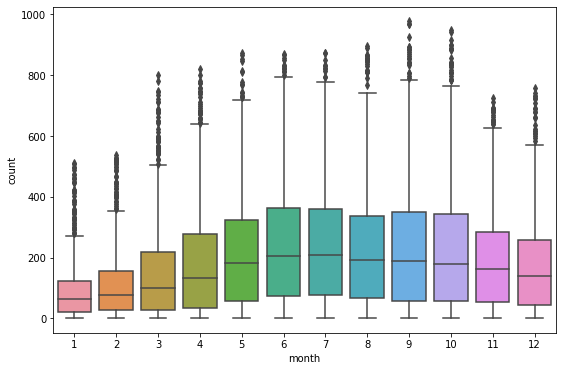

In [62]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'month', y = 'count', data = DF)
plt.show()

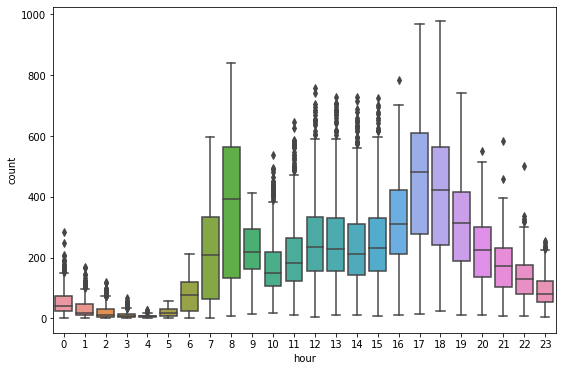

In [61]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'hour', y = 'count', data = DF)
plt.show()

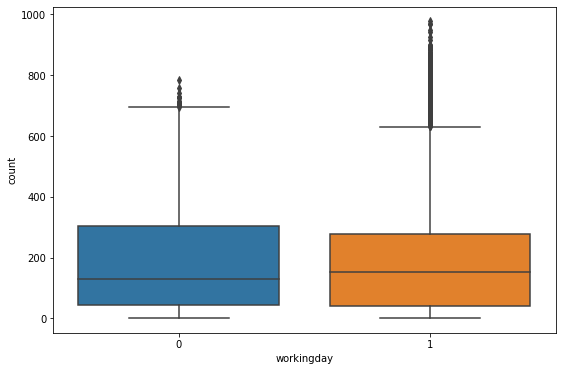

In [64]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'workingday', y = 'count', data = DF)
plt.show()

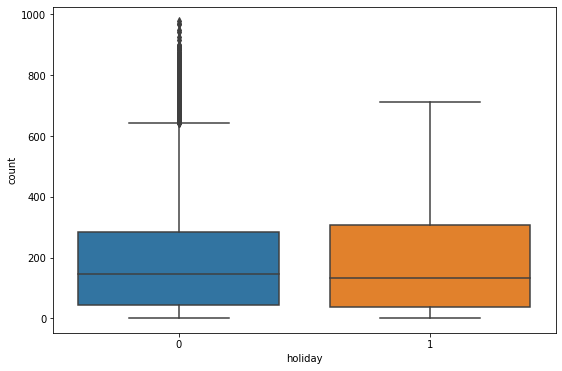

In [65]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'holiday', y = 'count', data = DF)
plt.show()

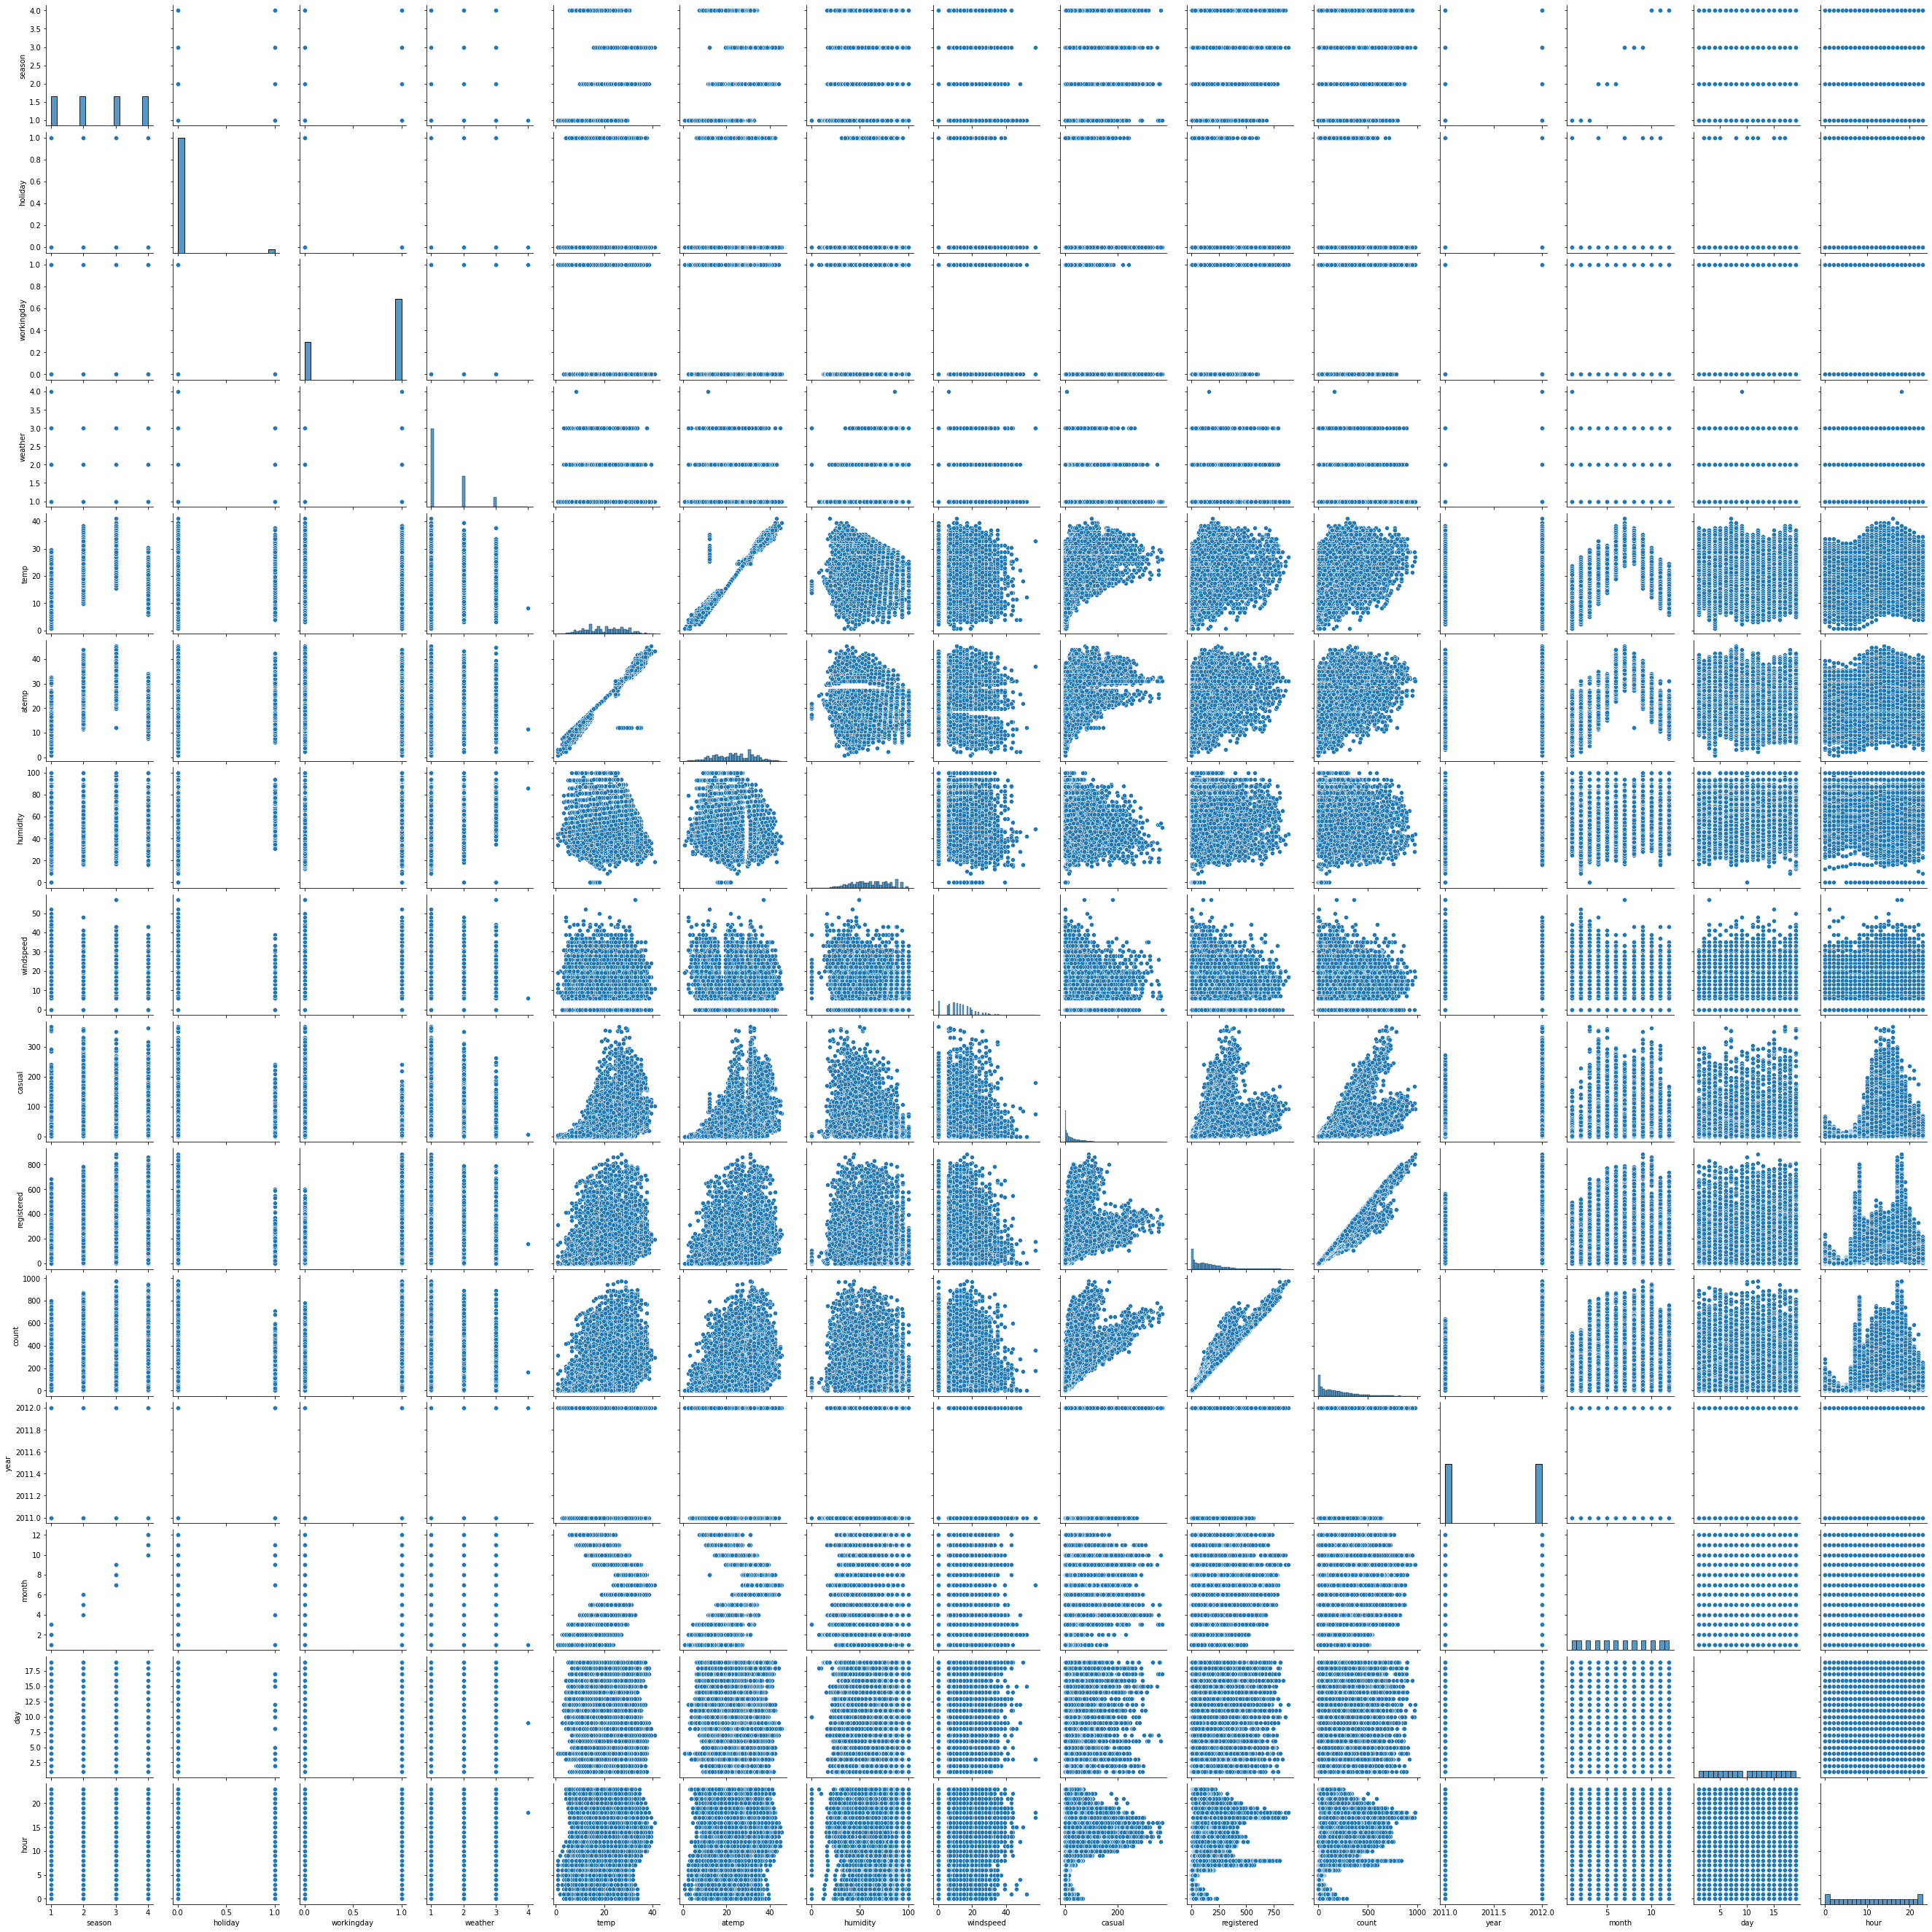

In [84]:
sns.pairplot(DF)  
plt.show()

In [111]:

drop_columns = ['casual','registered','year','day','season','atemp','weather'] # 서로 겹치거나 필요없는

DF.drop(drop_columns, axis = 1,inplace = True)

In [112]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   humidity    10886 non-null  int64  
 4   windspeed   10886 non-null  float64
 5   count       10886 non-null  int64  
 6   month       10886 non-null  int64  
 7   hour        10886 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 680.5 KB


# 모델링

In [143]:
train_set, test_set = train_test_split(DF, test_size = 0.3, random_state = 2045)
train_set.shape, test_set.shape

((7620, 8), (3266, 8))

In [144]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 6403 to 7031
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     7620 non-null   int64  
 1   workingday  7620 non-null   int64  
 2   temp        7620 non-null   float64
 3   humidity    7620 non-null   int64  
 4   windspeed   7620 non-null   float64
 5   count       7620 non-null   int64  
 6   month       7620 non-null   int64  
 7   hour        7620 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 535.8 KB


In [145]:
Model_1 = smf.ols(formula = 'count ~ holiday + workingday + temp + humidity + windspeed + month + hour', data = train_set).fit()


In [146]:
y_hat_1 = Model_1.predict(test_set[['holiday', 'workingday', 'temp',  'humidity',  'windspeed', 'month' , 'hour']])

In [147]:
mse1 = mean_squared_error(test_set.count, y_hat_1)
np.sqrt(mse1)

TypeError: ignored

In [130]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 1600 to 6082
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     3266 non-null   int64  
 1   workingday  3266 non-null   int64  
 2   temp        3266 non-null   float64
 3   humidity    3266 non-null   int64  
 4   windspeed   3266 non-null   float64
 5   count       3266 non-null   int64  
 6   month       3266 non-null   int64  
 7   hour        3266 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 229.6 KB


In [148]:
Model_2 = smf.ols(formula = 'count ~ holiday*workingday + temp*humidity*windspeed + month + hour', data = train_set).fit()

In [149]:
y_hat_2 = Model_2.predict(test_set[['holiday', 'workingday', 'temp',  'humidity',  'windspeed', 'month' , 'hour']])

In [150]:
mse2 = mean_squared_error(test_set.count, y_hat_2)
np.sqrt(mse2)

TypeError: ignored